# Intro to Natural Language Processing (NLP)

The Natural Language Processing (NLP) field is incredibly vast, and it has applications in virtually every aspect of data science. In this notebook, we will walk through a **very brief** survey of NLP, and provide some instruction on a couple handy tools along the way.

NLP tools span a wide range of implementations, and it is not uncommon for NLP packages to have conflicts with other Python libraries. So, to keep everything compatible in one place, it is recommended that you create a new pip environment for NLP projects. To set up an NLP pip environment for this lab, follow the steps in the "Pip Environment" section of the [Python Environment Setup page in Canvas](https://iu.instructure.com/courses/2181786/pages/week-1-%7C-python-environment-setup?module_item_id=30340853), and **use the *environment.yml* file provided in this folder.** This should install the packages you'll need for this lab.

Next, **[download a spaCy NLP model](https://spacy.io/models)** based on your preferences (in the NLP environment) so you can use the spaCy library installed in the environment.

*Optionally, if you prefer to use a different environment, install the following packages separately using pip: [Scikit-Learn](https://scikit-learn.org/stable/install.html#installing-the-latest-release), [spaCy](https://spacy.io/usage), [ScatterText](https://github.com/JasonKessler/scattertext#installation), [CorEx](https://ryanjgallagher.github.io/code/corex/example), and [vaderSentiment](https://github.com/cjhutto/vaderSentiment#installation).*

## Preprocessing

To illustrate preprocessing text data, we'll use the [spaCy](https://spacy.io/) package.

*spaCy is capable of **much** more than what we will use it for in this lab. More advanced implementations of spaCy may require knowledge outside the scope of this course.*

In [3]:
import pandas as pd
import spacy
from spacy import displacy
print(spacy.__version__)

3.7.4


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%config InlineBackend.figure_formats = ['svg']

### Tokenizing

The very first part of dealing with text data is to collect each **term** or unitary element of text (e.g., words, punctuation, etc.) in the form of "tokens".

In [6]:
# depends on your choice of spaCy model
nlp = spacy.load('en_core_web_sm')

In [7]:
intro = '''The Natural Language Processing (NLP) field is incredibly vast,
and it has applications in virtually every aspect of data science.
In this notebook, we will walk through a **very brief** survey of NLP,
and provide some instruction on a couple handy tools along the way.
'''

doc = nlp(intro)
doc

The Natural Language Processing (NLP) field is incredibly vast,
and it has applications in virtually every aspect of data science.
In this notebook, we will walk through a **very brief** survey of NLP,
and provide some instruction on a couple handy tools along the way.

In [8]:
print([t.text for t in doc])

['The', 'Natural', 'Language', 'Processing', '(', 'NLP', ')', 'field', 'is', 'incredibly', 'vast', ',', '\n', 'and', 'it', 'has', 'applications', 'in', 'virtually', 'every', 'aspect', 'of', 'data', 'science', '.', '\n', 'In', 'this', 'notebook', ',', 'we', 'will', 'walk', 'through', 'a', '*', '*', 'very', 'brief', '*', '*', 'survey', 'of', 'NLP', ',', '\n', 'and', 'provide', 'some', 'instruction', 'on', 'a', 'couple', 'handy', 'tools', 'along', 'the', 'way', '.', '\n']


In [6]:
for i, sentence in enumerate(doc.sents):
    print(f"sentence {i+1}\n\n", sentence)

sentence 1

 The Natural Language Processing (NLP) field is incredibly vast,
and it has applications in virtually every aspect of data science.

sentence 2

 In this notebook, we will walk through a **very brief** survey of NLP,
and provide some instruction on a couple handy tools along the way.



In [7]:
df_intro = []

for token in doc:
    df_intro.append([
        token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
        token.shape_, token.is_alpha, token.is_stop
    ])

In [8]:
df_intro = pd.DataFrame(columns=["text", "lemma_", "pos_", "tag_", "dep_", "shape_", "is_alpha", "is_stop"],
                        data=df_intro)

In [9]:
df_intro.sample(5)

,text,lemma_,pos_,tag_,dep_,shape_,is_alpha,is_stop
19,every,every,PRON,DT,nummod,xxxx,True,True
39,*,*,NOUN,NN,pobj,*,False,False
10,vast,vast,ADJ,JJ,acomp,xxxx,True,False
43,NLP,NLP,PROPN,NNP,pobj,XXX,True,False
34,a,a,DET,DT,det,x,True,True


What is a **stop word**?

In [10]:
df_intro[df_intro['is_stop']].sample(10)

,text,lemma_,pos_,tag_,dep_,shape_,is_alpha,is_stop
14,it,it,PRON,PRP,nsubj,xx,True,True
15,has,have,VERB,VBZ,conj,xxx,True,True
51,a,a,DET,DT,quantmod,x,True,True
19,every,every,PRON,DT,nummod,xxxx,True,True
33,through,through,ADP,IN,prep,xxxx,True,True
0,The,the,DET,DT,det,Xxx,True,True
31,will,will,AUX,MD,aux,xxxx,True,True
13,and,and,CCONJ,CC,cc,xxx,True,True
46,and,and,CCONJ,CC,cc,xxx,True,True
17,in,in,ADP,IN,prep,xx,True,True


spaCy defines **lemmas** to be *"the base forms of words. For example, the lemma of `was` is `be`, and the lemma of `rats` is `rat`."*

In [11]:
t = nlp('running')[0]
t.lemma_

'run'

**Sentence Dependencies**

We can visualize some of these attributes (like the sentence dependencies) using [displacy](https://spacy.io/usage/visualizers).

In [12]:
doc = nlp('We can visualize these using displacy.')

In [13]:
displacy.render(doc, style='dep', options={'distance': 120})

Note: this isn't always going to be *exactly* accurate, but it's very good and still useful.

### Named Entity Recognition

Some words are **Named Entities**: locations like "Alaska", dates like "January 1st", companies like "Google", etc. spaCy can tag these using [Named Entity Recognition](https://spacy.io/usage/linguistic-features#named-entities).

In [14]:
doc = nlp('... locations like "Alaska", dates like "January 1st", companies like "Google", etc.')

In [15]:
displacy.render(doc, style='ent')

### Multiple Documents

*NLP Terms: A **document** is a collection of **tokens**, and a **corpus** is a collection of documents.*

When spaCy processes text, it runs it through a [pipeline](https://spacy.io/usage/processing-pipelines) of different models to store token attributes for each token. This is how we get the functionality above. Though, when we are tokenizing multiple documents, we might not need all of these [built-in components](https://spacy.io/usage/processing-pipelines#built-in). For example, we might just need enough to filter our text based on the analysis done.

For example, suppose we've determined that we want to the remove the following tokens from a dataset of [coffee reviews](https://www.kaggle.com/datasets/schmoyote/coffee-reviews-dataset/) (descriptions):

- stop words (except the lemma "not", to maintain the idea of object negation)
- punctuation
- numbers

In this case, we don't need NER, Dependency Labels, or Document Labels. Removing these processes from the spaCy pipeline will save us some time.

In [10]:
df_coffee = pd.read_csv(r"C:\Users\rushy\Desktop\First_semester\i501\archive\coffee_analysis.csv")

In [11]:
df_coffee.drop_duplicates(subset='desc_1', inplace=True)

In [13]:
df_coffee.head()

,name,roaster,roast,loc_country,origin_1,origin_2,100g_USD,rating,review_date,desc_1,desc_2,desc_3
0,“Sweety” Espresso Blend,A.R.C.,Medium-Light,Hong Kong,Panama,Ethiopia,14.32,95,November 2017,"Evaluated as espresso. Sweet-toned, deeply ric...",An espresso blend comprised of coffees from Pa...,A radiant espresso blend that shines equally i...
1,Flora Blend Espresso,A.R.C.,Medium-Light,Hong Kong,Africa,Asia Pacific,9.05,94,November 2017,"Evaluated as espresso. Sweetly tart, floral-to...",An espresso blend comprised of coffees from Af...,"A floral-driven straight shot, amplified with ..."
2,Ethiopia Shakiso Mormora,Revel Coffee,Medium-Light,United States,Guji Zone,Southern Ethiopia,4.70,92,November 2017,"Crisply sweet, cocoa-toned. Lemon blossom, roa...",This coffee tied for the third-highest rating ...,"A gently spice-toned, floral- driven wet-proce..."
3,Ethiopia Suke Quto,Roast House,Medium-Light,United States,Guji Zone,Oromia Region,4.19,92,November 2017,"Delicate, sweetly spice-toned. Pink peppercorn...",This coffee tied for the third-highest rating ...,Lavender-like flowers and hints of zesty pink ...
4,Ethiopia Gedeb Halo Beriti,Big Creek Coffee Roasters,Medium,United States,Gedeb District,Gedeo Zone,4.85,94,November 2017,"Deeply sweet, subtly pungent. Honey, pear, tan...",Southern Ethiopia coffees like this one are pr...,A deeply and generously lush cup saved from se...


In [19]:
print(df_coffee['desc_1'].sample().iloc[0])

Floral-toned, richly sweet-savory. Black cherry, dark chocolate, marjoram, sandalwood, agave syrup in aroma and cup. Sweetly tart structure with brisk acidity; syrupy-smooth mouthfeel. The finish leads with notes of black cherry, rounding to cocoa tones in the long.


In [20]:
# nlp.pipe returns a generator
docs = nlp.pipe(df_coffee['desc_1'], disable=['ner', 'parser', 'textcat'])

# save the spaCy objects into the DataFrame
df_coffee['spacy_doc'] = list(docs)

In [21]:
def tokenizer(doc, join_tokens=False):
    '''
    Tokenize a single spaCy `doc`.

    join_tokens : bool
        Whether we want to return a list of strings or
        a list of lists. If True, join with space (" ").
    '''

    # collect lemmas that meet the following criteria:
    tokens = [w.lemma_.lower() for w in doc if
              (not w.is_stop
               and not w.is_punct
               and not w.like_num) \
              or (w.lemma_ == 'not')]

    if join_tokens:
        return ' '.join(tokens)
    else:
        return tokens

In [22]:
df_coffee['docs_clean'] = df_coffee['spacy_doc'].apply(tokenizer)

In [23]:
df_coffee[['desc_1', 'spacy_doc', 'docs_clean']].head()

,desc_1,spacy_doc,docs_clean
0,"Evaluated as espresso. Sweet-toned, deeply ric...","(Evaluated, as, espresso, ., Sweet, -, toned, ...","[evaluate, espresso, sweet, tone, deeply, rich..."
1,"Evaluated as espresso. Sweetly tart, floral-to...","(Evaluated, as, espresso, ., Sweetly, tart, ,,...","[evaluate, espresso, sweetly, tart, floral, to..."
2,"Crisply sweet, cocoa-toned. Lemon blossom, roa...","(Crisply, sweet, ,, cocoa, -, toned, ., Lemon,...","[crisply, sweet, cocoa, tone, lemon, blossom, ..."
3,"Delicate, sweetly spice-toned. Pink peppercorn...","(Delicate, ,, sweetly, spice, -, toned, ., Pin...","[delicate, sweetly, spice, tone, pink, pepperc..."
4,"Deeply sweet, subtly pungent. Honey, pear, tan...","(Deeply, sweet, ,, subtly, pungent, ., Honey, ...","[deeply, sweet, subtly, pungent, honey, pear, ..."


In [24]:
print(df_coffee['desc_1'].iloc[5])

Delicate, richly and sweetly tart. Dried hibiscus, fine musk, almond, sandalwood, raspberry in aroma and cup. Fruit-toned, deeply sweet structure with gently-expressed acidity; buoyant, satiny-smooth mouthfeel. The crisp, flavor-saturated finish is characterized by sweet-tart fruit and floral tones (raspberry, hibiscus).


In [25]:
print(df_coffee['docs_clean'].iloc[5])

['delicate', 'richly', 'sweetly', 'tart', 'dry', 'hibiscus', 'fine', 'musk', 'almond', 'sandalwood', 'raspberry', 'aroma', 'cup', 'fruit', 'tone', 'deeply', 'sweet', 'structure', 'gently', 'express', 'acidity', 'buoyant', 'satiny', 'smooth', 'mouthfeel', 'crisp', 'flavor', 'saturate', 'finish', 'characterize', 'sweet', 'tart', 'fruit', 'floral', 'tone', 'raspberry', 'hibiscus']


## Vectorization

Once we have our tokens selected and "cleaned", we need to convert the textual data into numerical data. **In other words, we need to convert each token (or document) into a *vector* representation.** There are many ways to represent textual information in the form of numerical data, but in this class we will cover Count Vectorization and Term-Frequency Inverse Document Frequency Vectorization; we'll call these **vectorizers**.

### Brief Intro to Scikit-Learn

**[Scikit-Learn](https://scikit-learn.org/stable/index.html) is the industry standard data science toolkit**, and it's modules are used in almost every aspect of data science. Here, we are going to use its [feature extraction module](https://scikit-learn.org/stable/modules/feature_extraction.html), which is built for extracting numerical features from data such as text or images. We will be using it for vectorization of text data, and in these cases, the scikit-learn process is:

1. Preprocess some data (e.g., from text to tokens)
2. Define a model (e.g., a vectorizer)
3. "Fit" that model to the data using `.fit`
4. Transform the data based on the model's parameters using `.transform`
    - We can also combine these last two steps with `.fit_transform`

In [26]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

### CountVectorizer

CountVectorizer converts each document into a "Bag of Words". In other words, the document is encoded based on the words it contains, **regardless of the order**. And, each term can be represented based on the documents it is contained in.

In [27]:
corpus_raw = ['This coffee is really really tasty.',
              'Tea smells and tastes better than coffee.',
              "Best smelling coffee I have ever smelled!"]

In [28]:
cv = CountVectorizer(ngram_range=(1, 1),  # capture "pairs", or "n-tuples" of adjacent words
                     max_df=1.0,          # exclude terms in ≥ `max_df` (or %) of docs
                     min_df=1,            # exclude terms in ≤ `min_df` (or %) of docs
                     max_features=None,   # maximum number of terms/ngrams to include
                     binary=False)        # only log 1s and 0s for term presence

X = cv.fit_transform(corpus_raw)

df = pd.DataFrame(X.toarray(),
                  index=corpus_raw,
                  columns=cv.get_feature_names_out())

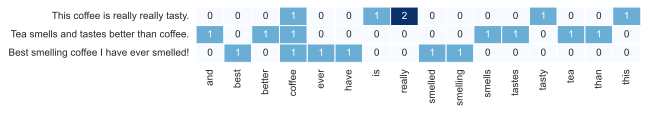

In [29]:
plt.figure(figsize=(8, 1))
g = sns.heatmap(df, cmap='Blues', annot=True, cbar=False, linewidths=1)

This is called a **document-term matrix**.

- We could use `max_df` to remove the term "coffee" since it occurs in every document. This is one example of extracting *informative* features from text; i.e., the term "coffee" doesn't provide new information for each document.
- Also, we can already see that some of these words give us more information than others. For example, "smelling" and "smells" mean roughly the same thing, and "had"/"have" aren't really necessary for understanding reviews.

This is why we use the filtering in spaCy.

In [30]:
docs = nlp.pipe(corpus_raw)
corpus_clean = [tokenizer(d, True) for d in docs]
corpus_clean

['coffee tasty', 'tea smell taste well coffee', 'good smell coffee smell']

In [31]:
cv = CountVectorizer(ngram_range=(1, 1),
                     max_df=0.9,
                     min_df=1,
                     max_features=None,
                     binary=False)

X = cv.fit_transform(corpus_clean)

df = pd.DataFrame(X.toarray(),
                  index=corpus_raw,
                  columns=cv.get_feature_names_out())

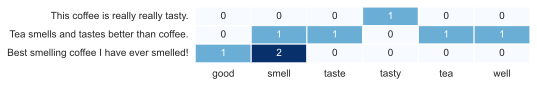

In [32]:
plt.figure(figsize=(6, 1))
g = sns.heatmap(df, cmap='Blues', annot=True, cbar=False, linewidths=1)

In [33]:
cv = CountVectorizer(ngram_range=(2, 2),  # use (1, 2) for unigrams *and* bigrams
                     max_df=0.9,
                     min_df=1,
                     max_features=None,
                     binary=False)

X = cv.fit_transform(corpus_clean)

df = pd.DataFrame(X.toarray(),
                  index=corpus_clean,
                  columns=cv.get_feature_names_out())

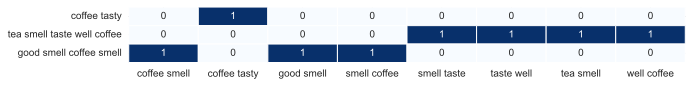

In [34]:
plt.figure(figsize=(10, 1))
g = sns.heatmap(df, cmap='Blues', annot=True, cbar=False, linewidths=1)

Now these vectors are a bit more meaningful. Notice, in a way, bigrams are a contrived way to capture context in textual data.

### TFIDF Vectorizer

Downsides of Count Vectorizer:

- Counts can be too simplistic
- High counts can dominate, especially for high frequency words or long documents
- Each word is treated equally, when some terms might be more "important" than others

We define TFIDF as:

$$
\text{TF-IDF} = \text{term frequency} * \text{inverse document frequency}
$$

where:

$$
\begin{align*}
\text{term frequency} &= \frac{\text{term count in document}}{\text{total terms in document}} \\[8pt]
\text{inverse document frequency} &= \log\bigg(\frac{\text{total number of documents} + 1}{\text{number of documents with term} + 1}\bigg)
\end{align*}
$$

This measure is calculated for every term-document combination:

- The **term frequency** measures the "density" of a word in a document
- The **inverse document frequency** (without the $\log$) measures the size of the corpus *in terms of* the number of documents containing the term. E.g., if IDF=5 then the corpus is 5 times the size of the "sub-corpus" of documents containing the term. The $\log$ dampens the effect of the inverse document frequency as the denominator gets very small or the numerator gets very large.

So, we can think of TF as the "main" measure, and IDF as the "scaling" factor:

- Very common words across all documents will get a lower score.
- Rare words considering all documents get a higher score.

In [35]:
cv = TfidfVectorizer(max_df=1.0,
                     min_df=1,
                     max_features=None)

X = cv.fit_transform(corpus_clean)

df = pd.DataFrame(X.toarray(),
                  index=corpus_clean,
                  columns=cv.get_feature_names_out())

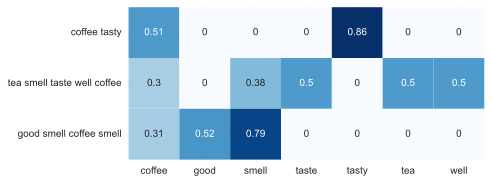

In [36]:
sns.heatmap(df, square=True, cmap='Blues', annot=True, cbar=False);

## Topic Modeling

### Matrix Decomposition

The document term matrix $X$ is a matrix just like any other in Linear Algebra. Just so, it defines a row space (the documents represented as linear combinations of terms), and column space (terms represented as a linear combination of documents). With this, there are a few matrix decomposition methods we can use to extract further information about these documents and terms.

In [37]:
from sklearn.decomposition import TruncatedSVD, NMF, PCA

### Singular Value Decomposition

Singular Value Decomposition is a guaranteed decomposition for any rectangular matrix. It creates the following equality:

$$
X = U\Sigma V^\top
$$

**Breifly**:
- Each row of $U$ represents the corresponding document in terms of "topics directions" along the columns.
- The rows of $V$ (columns of $V^\top$) represent similarly represented version of the terms.
- The $\Sigma$ matrix contains the "variance explained" by each of these topics, sorted in descending order.

As far as naming goes:

- The analysis of these resulting matrices is called **Principal Components Analysis (PCA)**.
- When used with text data, this analysis is called **Latent Semantic Analysis (LSA)**.

In [38]:
# we need a list/array of strings to vectorize
corpus = df_coffee['spacy_doc'].apply(tokenizer, args={'join_tokens':True})

In [39]:
corpus.shape

(2092,)

In [40]:
cv = TfidfVectorizer(max_df=0.9,
                     min_df=0.1,
                     max_features=None)

X = cv.fit_transform(corpus)
# df = pd.DataFrame(X, index=corpus, columns=cv.get_feature_names_out())

In [41]:
X.shape

(2092, 65)

Note, we use `TruncatedSVD` here because it's a more efficient implementation of SVD. PCA centers the data before running the algorithm, which is more "appropriate" but takes more time. This does cause a few inconsistencies in the "sorted" $\Sigma$.

In [42]:
lsa = TruncatedSVD(n_components=5)  # results only change for larger (unseen) values

doc_topic = lsa.fit_transform(X)
lsa.explained_variance_ratio_

array([0.00488089, 0.08197356, 0.04777372, 0.0467806 , 0.03499091])

In [43]:
doc_topic = pd.DataFrame(doc_topic.round(3),
                         index=df_coffee['desc_1'])
# doc_topic.head()

In [44]:
topic = 1
n_docs = 5

print(f"Top Documents for topic {topic}:\n")

for doc in doc_topic[topic].abs().sort_values(ascending=False).iloc[:n_docs].index:
    print(doc, '\n')

Top Documents for topic 1:

Sweetly floral and delicately cocoa-toned. Honeysuckle, cocoa nib, Concord grape, agave, lemon-thyme in aroma and cup. High-toned structure with juicy, confident acidity; buoyant, lively, viscous mouthfeel. Honeysuckle and cocoa nib characterize the sweet finish. 

Evaluated as espresso. Roast-rounded, chocolaty. Dark chocolate, gardenia, gently scorched cedar, molasses, prune in aroma and small cup. Viscous, creamy mouthfeel; chocolaty, slightly smoky finish. In three parts milk, floral and chocolate notes preside.  

Evaluated as espresso. Fruit-forward, chocolaty. Dark chocolate, black cherry, lily, molasses, cedar in aroma and small cup. Very syrupy mouthfeel; crisp, chocolaty finish. In three parts milk, dark chocolate notes take center stage, supported by notes of black cherry and lily. 

Evaluated as espresso. Bittersweet, richly pungent, chocolaty and floral. Dark chocolate, plum, cedar, magnolia in aroma and small cup. Plump, satiny mouthfeel; bitte

In [45]:
topic_term = pd.DataFrame(lsa.components_.round(3),
                          columns = cv.get_feature_names_out())

topic_term

,acidity,almond,bake,balanced,bright,brisk,butter,cedar,center,chocolate,...,sweet,sweetly,syrup,syrupy,tart,tone,undertone,velvety,vibrant,zest
0,0.192,0.124,0.090,0.103,0.117,0.072,0.068,0.167,0.082,0.256,...,0.280,0.146,0.079,0.144,0.195,0.249,0.077,0.070,0.066,0.148
1,0.072,-0.025,-0.142,0.065,0.120,-0.019,-0.019,-0.107,-0.003,-0.461,...,0.034,0.029,0.041,0.038,0.113,0.032,-0.016,-0.046,0.070,0.040
2,0.038,0.066,0.300,-0.046,-0.126,0.197,0.057,0.150,-0.008,-0.071,...,0.098,-0.053,0.056,-0.149,-0.103,0.107,0.057,0.127,-0.090,0.019
3,-0.121,0.011,-0.110,-0.007,0.011,-0.085,0.033,0.066,-0.012,-0.031,...,-0.173,-0.038,-0.046,-0.041,0.032,0.097,0.005,-0.014,-0.018,0.011
4,-0.082,-0.171,-0.118,0.018,-0.164,-0.027,-0.081,-0.115,-0.054,-0.063,...,0.086,-0.157,-0.057,0.045,-0.382,-0.070,0.035,0.016,-0.049,-0.064


In [46]:
# the third "topic"
topic = 2
n_terms = 10

topic_term.T[topic].abs().sort_values(ascending=False).iloc[:n_terms]

bake          0.300
sandalwood    0.268
dark          0.258
nut           0.237
flavor        0.218
savory        0.207
juicy         0.207
cut           0.198
brisk         0.197
hazelnut      0.189
Name: 2, dtype: float64

### Non-Negative Matrix Factorization

[NMF](https://en.wikipedia.org/wiki/Non-negative_matrix_factorization) is very similar to SVD. Here, we have the following decomposition.

$$
X = WH
$$

In this case though, all values in $W$ and $H$ are positive, and we can *approximate* this decomposition because all values in $X$ are positive.

In [47]:
nmf = NMF(4)  # here, the number will change the results
doc_topic = nmf.fit_transform(X)

In [48]:
doc_topic = pd.DataFrame(doc_topic.round(3),
                         index=df_coffee['desc_1'])
# doc_topic.head()

In [49]:
topic = 1
n_docs = 5

print(f"Top Documents for topic {topic}:\n")

for doc in doc_topic[topic].abs().sort_values(ascending=False).iloc[:n_docs].index:
    print(doc, '\n')

Top Documents for topic 1:

Evaluated as espresso. Fruit-forward, chocolaty. Dark chocolate, black cherry, lily, molasses, cedar in aroma and small cup. Very syrupy mouthfeel; crisp, chocolaty finish. In three parts milk, dark chocolate notes take center stage, supported by notes of black cherry and lily. 

Evaluated as espresso. Bittersweet, richly pungent, chocolaty and floral. Dark chocolate, plum, cedar, magnolia in aroma and small cup. Plump, satiny mouthfeel; bittersweet and chocolaty in the finish. Chocolate and flowers dominate in three parts milk.  

Evaluated as espresso. Deeply chocolaty, balanced, roast-rounded. Dark chocolate, nectarine, molasses, gently scorched cedar, rhododendron in aroma and small cup. Full, satiny mouthfeel; crisp, chocolaty finish. In three parts milk the dark chocolate notes are amplified, as are the florals 

Evaluated as espresso. Roast-rounded, chocolaty. Dark chocolate, gardenia, gently scorched cedar, molasses, prune in aroma and small cup. Vis

In [50]:
topic_term = pd.DataFrame(nmf.components_.round(3),
                          columns = cv.get_feature_names_out())

topic_term

,acidity,almond,bake,balanced,bright,brisk,butter,cedar,center,chocolate,...,sweet,sweetly,syrup,syrupy,tart,tone,undertone,velvety,vibrant,zest
0,0.934,0.391,0.000,0.612,0.863,0.000,0.083,0.022,0.351,0.805,...,1.422,0.898,0.234,1.221,0.997,0.602,0.091,0.000,0.557,0.650
1,0.000,0.173,0.000,0.047,0.000,0.000,0.133,0.603,0.114,1.579,...,0.029,0.135,0.000,0.173,0.178,0.398,0.179,0.118,0.000,0.136
2,0.547,0.485,0.961,0.104,0.000,0.611,0.301,0.660,0.210,0.709,...,0.897,0.238,0.294,0.032,0.199,0.702,0.276,0.438,0.000,0.353
3,0.492,0.163,0.000,0.363,0.487,0.017,0.112,0.284,0.167,0.000,...,0.503,0.333,0.230,0.308,0.705,0.737,0.192,0.048,0.260,0.377


In [51]:
topic = 0
n_terms = 10

topic_term.T[topic].sort_values(ascending=False).iloc[:n_terms]

savory        2.346
sweet         1.422
long          1.284
flavor        1.231
syrupy        1.221
sandalwood    1.121
juicy         1.121
structure     1.107
resonant      1.048
richly        1.023
Name: 0, dtype: float64

In [52]:
topic = 1
n_terms = 10

topic_term.T[topic].sort_values(ascending=False).iloc[:n_terms]

chocolate    1.579
dark         1.304
milk         1.131
espresso     1.126
evaluate     1.099
small        1.096
chocolaty    1.014
cedar        0.603
fruit        0.520
floral       0.493
Name: 1, dtype: float64

As you can tell, this often produces more agreeable results than LSA.

### Latent Dirichlet Allocation (LDA)

[LDA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html) is a "generative" model that builds topics with the assumption that documents are generated based on a probability distribution of topics, and that topics are just a probability distribution of terms.

In [53]:
from sklearn.decomposition import LatentDirichletAllocation

In [54]:
# these parameters usually require a good bit of tuning ...
lda = LatentDirichletAllocation(n_components=5,
                                max_iter=50)

X_topics = lda.fit_transform(X)

In [55]:
df_lda = pd.DataFrame(data = X_topics,
                      index = corpus)

In [56]:
topic = 0
n_docs = 3

for d in df_lda[topic].sort_values(ascending=False).iloc[:n_docs].index:
    print(d, '\n')

richly sweet fruit forward dried apricot cocoa nib star jasmine almond maple syrup aroma cup sweetly tart structure bright juicy acidity crisp syrupy mouthfeel long linger finish center dry apricot cocoa note support cedar like wood 

delicate berry tone richly sweet raspberry honey narcissus like flower cedar almond butter aroma cup sweetly tart structure juicy high tone acidity lively mouthfeel resonant flavor saturate finish consolidate note raspberry almond support sweet floral hint 

high tone richly fruit forward balanced strawberry guava jasmine cocoa nib sandalwood pink grapefruit zest aroma cup sweet tart structure crisp bright acidity vibrantly plush syrupy mouthfeel resonant finish center guava jasmine note undertone cocoa nib 



In [57]:
topic = 1
n_docs = 3

for d in df_lda[topic].sort_values(ascending=False).iloc[:n_docs].index:
    print(d, '\n')

deeply sweet richly nut tone hazelnut butter magnolia like flower crisp pear cedar agave syrup aroma cup sweet structure gentle round acidity syrupy smooth mouthfeel finish consolidate deep nut rich aromatic wood 

fruit tone richly chocolaty dark chocolate dry blueberry freesia like flower honey cedar aroma cup sweet tart structure round gentle acidity syrupy mouthfeel finish consolidate blueberry chocolate note hint cedar 

crisply sweet balanced spice tone bake chocolate almond butter date clove magnolia aroma cup sweet structure gentle round acidity plush syrupy mouthfeel chocolaty nut tone finish support magnolia like flower 



In [58]:
df_lda_terms = pd.DataFrame(data = lda.components_,
                            columns = cv.get_feature_names_out())

In [59]:
topic = 0
n_terms = 10

df_lda_terms.T[topic].sort_values(ascending=False).iloc[:n_terms]

cocoa        173.729253
nib          148.041852
tart          91.054841
tone          83.626504
sweet         79.706775
bright        76.706024
juicy         74.092692
acidity       71.742695
structure     62.287788
floral        55.370962
Name: 0, dtype: float64

In [60]:
topic = 1
n_terms = 10

df_lda_terms.T[topic].sort_values(ascending=False).iloc[:n_terms]

chocolate    103.755570
bake          79.127883
chocolaty     76.855851
cedar         70.560623
sweet         69.585832
tone          57.994594
gentle        56.010294
hazelnut      54.467662
acidity       52.168683
structure     50.941488
Name: 1, dtype: float64

### Anchored Correlation Explanation (CorEx)

[CorEx](https://github.com/gregversteeg/corex_topic) is a discriminative model, which starts from $X$ (documents/words) to determine $Y$ (topics). CorEx looks for groups of words that are in the same topic, a.k.a. have high Total Correlation (TC), or convey the same information.

- If words are **tightly related** (always appear together in the same topic/document), TC will be high. This is a good topic.
- If the words are all **independent** (never appear together in the same document or topic), TC = 0. This is a bad topic.
- CorEx creates a partition across terms. I.e., **terms can only occur in a single topic**.

CorEx roughly follows this algorithm:
1. Look for a group of words that are both as broad (in many documents) and overlapping as possible (both together will lead to high TC), and call this a topic.
2. Repeat the process for another set of words (not overlapping with your previous group) with as high a TC as possible, and call this the next topic.

As we create more topics, each subsequent topic will have lower TC.

In [61]:
from corextopic import corextopic as ct

In [62]:
# CorEx requires count data
cv = CountVectorizer(max_df=0.9,
                     min_df=0.1,
                     max_features=None)

X = cv.fit_transform(corpus)

In [63]:
topic_model = ct.Corex(n_hidden=5,                        # number of topics
                       words=cv.get_feature_names_out(),  # list of terms in corpus
                       seed=1)

doc_topic = topic_model.fit_transform(X, words=cv.get_feature_names_out(), docs=corpus)

In [64]:
# Print all topics from the CorEx topic model
topics = topic_model.get_topics()

for n, topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print(f"{n}: " + ','.join(topic_words))

0: espresso,evaluate,small,milk,structure,acidity,consolidate,floral,syrup,crisp
1: chocolate,dark,nib,cocoa,chocolaty,bake,delicate,lemon,deep,zest
2: juicy,cut,gentle,bright,fresh,sandalwood,brisk,tart,high,nut
3: short,long,lead,undertone,rich,center,almond
4: sweet,sweetly,savory,deeply,fruit,smooth


Take a look at how you can use [anchor words](https://github.com/gregversteeg/corex_topic/tree/master#using-anchor-words) to guide the topic creation.

## ScatterText

Scattertext is great for
- Visually inspecting text
- Comparing/Contrasting corpora
- And more...

Check out Jason Kessler's GitHub project for more information: [here](https://github.com/JasonKessler/scattertext).

In [65]:
import scattertext as st

In [66]:
convention_df = st.SampleCorpora.ConventionData2012.get_data()

In [67]:
convention_df.head()

,party,text,speaker
0,democrat,Thank you. Thank you. Thank you. Thank you so ...,BARACK OBAMA
1,democrat,"Thank you so much. Tonight, I am so thrilled a...",MICHELLE OBAMA
2,democrat,Thank you. It is a singular honor to be here t...,RICHARD DURBIN
3,democrat,"Hey, Delaware. \nAnd my favorite Democrat, Jil...",JOSEPH BIDEN
4,democrat,"Hello. \nThank you, Angie. I'm so proud of how...",JILL BIDEN


In [68]:
corpus = st.CorpusFromPandas(convention_df,
                             category_col='party',
                             text_col='text',
                             nlp=st.whitespace_nlp_with_sentences
                            ).build()

In [69]:
html = st.produce_scattertext_explorer(
        corpus,
        category='democrat',
        category_name='Democratic',
        not_category_name='Republican',
        minimum_term_frequency=10,
        pmi_threshold_coefficient=5,
        width_in_pixels=1000,
        metadata=convention_df['speaker'],
        )

In [70]:
with open('demo.html', 'wb') as f:
    f.write(html.encode('utf-8'))

## Sentiment Analysis with VADER

According to the documentation:

    VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. [...]
    
    Sentiment ratings from 10 independent human raters (all pre-screened, trained, and quality checked for optimal inter-rater reliability). Over 9,000 token features were rated on a scale from "[–4] Extremely Negative" to "[4] Extremely Positive", with allowance for "[0] Neutral (or Neither, N/A)".

In [71]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [72]:
sentences = ["VADER is smart, handsome, and funny.",  # positive sentence example
             "VADER is smart, handsome, and funny!",  # punctuation emphasis handled correctly (sentiment intensity adjusted)
             "VADER is very smart, handsome, and funny.", # booster words handled correctly (sentiment intensity adjusted)
             "VADER is VERY SMART, handsome, and FUNNY.",  # emphasis for ALLCAPS handled
             "VADER is VERY SMART, handsome, and FUNNY!!!", # combination of signals - VADER appropriately adjusts intensity
             "VADER is VERY SMART, uber handsome, and FRIGGIN FUNNY!!!", # booster words & punctuation make this close to ceiling for score
             "VADER is not smart, handsome, nor funny.",  # negation sentence example
             "The book was good.",  # positive sentence
             "At least it isn't a horrible book.",  # negated negative sentence with contraction
             "The book was only kind of good.", # qualified positive sentence is handled correctly (intensity adjusted)
             "The plot was good, but the characters are uncompelling and the dialog is not great.", # mixed negation sentence
             "Today SUX!",  # negative slang with capitalization emphasis
             "Today only kinda sux! But I'll get by, lol", # mixed sentiment example with slang and constrastive conjunction "but"
             "Make sure you :) or :D today!",  # emoticons handled
             # "Catch utf-8 emoji such as such as 💘 and 💋 and 😁",  # emojis handled, ignored for seaborn plot below
             "Not bad at all"  # Capitalized negation
             ]

In [73]:
df_sentiment = []

analyzer = SentimentIntensityAnalyzer()

for sentence in sentences:
    vs = analyzer.polarity_scores(sentence)
    df_sentiment.append(vs)

In [74]:
df_sentiment = pd.DataFrame(df_sentiment,
                            index = sentences)

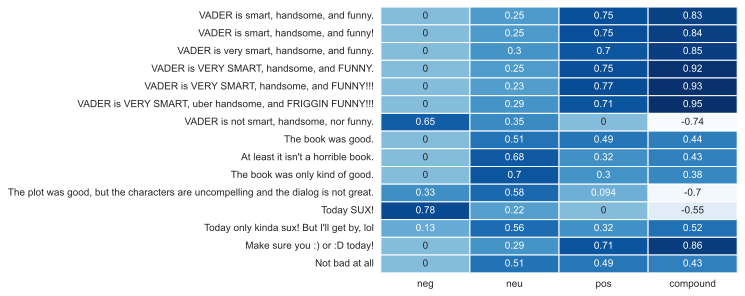

In [75]:
sns.heatmap(df_sentiment, cmap='Blues', annot=True, cbar=False, linewidths=1);

# EXERCISES

## Exercise 1

Using a book from [Project Gutenberg](https://www.gutenberg.org/), get the text data directly from its URL using the `requests` package. Break the book into 50 or more sensible "chunks" like chapters or paragraphs, organizing them into a list.

Load this data into a spaCy pipeline and analyze either Named Entities or Parts of Speech in each chunk.

Provide your analysis: What types of entities or parts of speech are common, and what are uncommon? What insights can you draw from these patterns?

*Note*: Do not download any file, make use of URL in your code.

In [26]:
import requests
url = "https://www.gutenberg.org/cache/epub/84/pg84-images.html#letter1"
response = requests.get(url)
text = response.text

In [70]:
from bs4 import BeautifulSoup

def clean_html(texts):
  soup = BeautifulSoup(texts, "html.parser")
  return soup.get_text().strip()
cleaned_sentence = clean_html(str(text))



In [71]:
doc1 = nlp(cleaned_sentence)
for i, sentence in enumerate(doc1.sents):
    print(f"sentence {i+1}\n\n", sentence)

sentence 1

 The Project Gutenberg eBook of Frankenstein, by Mary Wollstonecraft Shelley
























The Project Gutenberg eBook of Frankenstein; Or, The Modern Prometheus

sentence 2

 This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever.
sentence 3

 You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org.
sentence 4

 If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.

sentence 5

 Title: Frankenstein; Or, The Modern Prometheus

Author: Mary Wollstonecraft Shelley

Release date: October 1, 1993
sentence 6

 [eBook #84]
                Most recently updated: December 2, 2022
Language: English
Credits: Judith Boss, Christy Phillips, Lynn Hanninen and David Meltzer.
sentence 7

 HTML version by Al 

In [82]:
from collections import Counter
named_entities = [(ent.text, ent.label_) for ent in doc.ents]

# Count occurrences of each entity type
entity_counts = Counter([ent[1] for ent in named_entities])

# Print the most common entity types
most_common_entities = entity_counts.most_common()
print("Most common entity types:")
for entity, count in most_common_entities:
    print(f"{entity}: {count}")

Most common entity types:
PERSON: 559
DATE: 294
GPE: 236
CARDINAL: 226
ORG: 152
TIME: 143
ORDINAL: 123
NORP: 61
LAW: 31
LOC: 29
PERCENT: 22
WORK_OF_ART: 19
LANGUAGE: 11
PRODUCT: 10
QUANTITY: 8
FAC: 3
EVENT: 2
MONEY: 2


In [80]:
entities_token = []

for token in doc1:
    entities_token.append([
        token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
        token.shape_, token.is_alpha, token.is_stop
    ])
entities_token = pd.DataFrame(columns=["text", "lemma_", "pos_", "tag_", "dep_", "shape_", "is_alpha", "is_stop"],
                        data=entities_token)
entities_token.sample(10)

,text,lemma_,pos_,tag_,dep_,shape_,is_alpha,is_stop
53131,pity,pity,VERB,VB,ccomp,xxxx,True,False
54061,.,.,PUNCT,.,punct,.,False,False
92950,re,re,VERB,VB,conj,xx,True,True
24613,of,of,ADP,IN,prep,xx,True,True
14219,\r\n,\r\n,SPACE,_SP,dep,\r\n,False,False
46551,lively,lively,ADJ,JJ,amod,xxxx,True,False
79774,;,;,PUNCT,:,punct,;,False,False
81135,your,your,PRON,PRP$,poss,xxxx,True,True
72233,I,I,PRON,PRP,nsubj,X,True,True
42371,me,I,PRON,PRP,dobj,xx,True,True


In [81]:
entities_token['pos_'].value_counts()

pos_
NOUN     14831
PRON     12063
PUNCT    10789
VERB     10526
ADP       9143
DET       7444
SPACE     6159
ADJ       5306
AUX       5100
CCONJ     4096
ADV       3623
SCONJ     2211
PART      1911
PROPN     1741
NUM        415
INTJ        83
X           26
SYM          7
Name: count, dtype: int64

top 4 Most common entity types:
PERSON: 559
DATE: 294
GPE: 236
CARDINAL: 226,

top 4 parts of speech
NOUN     14831
PRON     12063
PUNCT    10789
VERB     10526

## Exercise 2

Apply spaCy to extract the most meaningful content from your documents, considering options like excluding stop words or focusing on nouns (i.e. preprocessing and filtering).

Perform a sentiment analysis on the refined data. Create visualization of your result.

Summarize your results by explaining how sentiment changes across sections.

In [77]:
# write your code here ...

In [93]:
from bs4 import BeautifulSoup

def clean_html(texts):
  soup = BeautifulSoup(texts, "html.parser")
  return soup.get_text().strip()
cleaned_sentence = clean_html(str(text))

In [94]:
from bs4 import BeautifulSoup
from spacy.lang.en.stop_words import STOP_WORDS
from spacy import displacy
from collections import Counter
from textblob import TextBlob

doc2 = nlp(cleaned_sentence)

sentiments = []
# Process each sentence and get sentiment
for sentence in doc2.sents:
    sentence_blob = TextBlob(sentence.text)
    polarity = sentence_blob.sentiment.polarity
    sentiments.append(polarity)

# Print the sentence and its sentiment polarity
for i, sentence in enumerate(doc2.sents):
    print(f"Sentence {i+1}:\n\n{sentence.text}")
    print(f"Polarity: {sentiments[i]}\n\n")


Sentence 1:

The Project Gutenberg eBook of Frankenstein, by Mary Wollstonecraft Shelley
























The Project Gutenberg eBook of Frankenstein; Or, The Modern Prometheus

Polarity: 0.2


Sentence 2:

This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever.
Polarity: 0.1875


Sentence 3:

You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org.
Polarity: 0.0


Sentence 4:

If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.

Polarity: 0.0


Sentence 5:

Title: Frankenstein; Or, The Modern Prometheus

Author: Mary Wollstonecraft Shelley

Release date: October 1, 1993
Polarity: 0.2


Sentence 6:

[eBook #84]
                Most recently updated: December 2, 2022
Language: English
Credits: Judith Boss, 

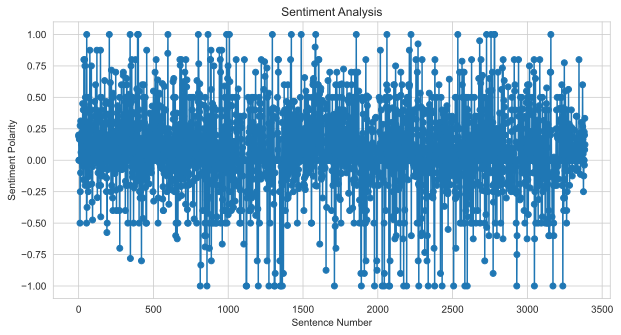

In [95]:
plt.figure(figsize=(10, 5))
plt.plot(range(len(sentiments)), sentiments, marker='o', linestyle='-')
plt.title("Sentiment Analysis")
plt.xlabel("Sentence Number")
plt.ylabel("Sentiment Polarity")
plt.grid(True)
plt.show()

In [105]:
df = pd.DataFrame({
    'Sentence': [sentence.text for sentence in doc2.sents],
    'Polarity': sentiments
})

print(df)


                                               Sentence  Polarity
0     The Project Gutenberg eBook of Frankenstein, b...  0.200000
1     This ebook is for the use of anyone anywhere i...  0.187500
2     You may copy it, give it away or re-use it und...  0.000000
3     If you are not located in the United States,\r...  0.000000
4     Title: Frankenstein; Or, The Modern Prometheus...  0.200000
...                                                 ...       ...
3381  For forty years, he produced and\r\ndistribute... -0.038462
3382  Project Gutenberg™ eBooks are often created fr...  0.200000
3383  Thus, we do not\r\nnecessarily keep eBooks in ...  0.083333
3384  Most people start at our website which has the...  0.333333
3385  This website includes information about Projec...  0.124242

[3386 rows x 2 columns]


In [106]:
docs5 = nlp.pipe(df['Sentence'])
df['spacy_doc'] = list(docs5)
def tokenizer(doc, join_tokens=False):
    tokens = [w.lemma_.lower() for w in doc if
              (not w.is_stop
               and not w.is_punct
               and not w.like_num) \
              or (w.lemma_ == 'not')]
    if join_tokens:
        return ' '.join(tokens)
    else:
        return tokens
df['docs_clean'] = df['spacy_doc'].apply(tokenizer)
df[['Sentence', 'spacy_doc', 'docs_clean','Polarity']].head()

,Sentence,spacy_doc,docs_clean,Polarity
0,"The Project Gutenberg eBook of Frankenstein, b...","(The, Project, Gutenberg, eBook, of, Frankenst...","[project, gutenberg, ebook, frankenstein, mary...",0.2000
1,This ebook is for the use of anyone anywhere i...,"(This, ebook, is, for, the, use, of, anyone, a...","[ebook, use, united, states, \r\n, part, world...",0.1875
2,"You may copy it, give it away or re-use it und...","(You, may, copy, it, ,, give, it, away, or, re...","[copy, away, use, term, \r\n, project, gutenbe...",0.0000
3,"If you are not located in the United States,\r...","(If, you, are, not, located, in, the, United, ...","[not, locate, united, states, \r\n, check, law...",0.0000
4,"Title: Frankenstein; Or, The Modern Prometheus...","(Title, :, Frankenstein, ;, Or, ,, The, Modern...","[title, frankenstein, modern, prometheus, \n\n...",0.2000


In [107]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
corpus_raw1 = df['Sentence'][0]

# Create a list containing the single string
corpus = [corpus_raw1]

# Initialize CountVectorizer
cv = CountVectorizer(ngram_range=(1, 1),
                     max_df=1.0,
                     min_df=1,
                     max_features=None,
                     binary=False)

# Fit and transform the corpus
X = cv.fit_transform(corpus)

# Create DataFrame from the document-term matrix
df = pd.DataFrame(X.toarray(),
                  index=corpus,
                  columns=cv.get_feature_names_out())

# Display the DataFrame
print(df)


                                                    by  ebook  frankenstein  \
The Project Gutenberg eBook of Frankenstein, by...   1      2             2   

                                                    gutenberg  mary  modern  \
The Project Gutenberg eBook of Frankenstein, by...          2     1       1   

                                                    of  or  project  \
The Project Gutenberg eBook of Frankenstein, by...   2   1        2   

                                                    prometheus  shelley  the  \
The Project Gutenberg eBook of Frankenstein, by...           1        1    3   

                                                    wollstonecraft  
The Project Gutenberg eBook of Frankenstein, by...               1  


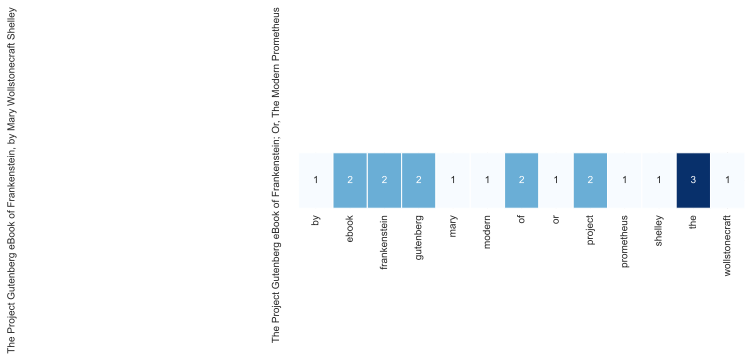

In [108]:
plt.figure(figsize=(8, 1))
g = sns.heatmap(df, cmap='Blues', annot=True, cbar=False, linewidths=1)